Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

### 3) Is there a global warming?
    Let's read the data from the "GlobalTemperatures.csv" file, which has a monthly Earth’s temperature and plot it on the chart.

In [ ]:
global_temp=pd.read_csv('/content/GlobalTemperatures.csv')

In [ ]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
years                                         object
dtype: object

To get the year

In [ ]:
global_temp['dt'][0].split('-')[0]

'1750'

In [ ]:
def fetch_year(date):
    return date.split('-')[0]

In [ ]:
global_temp['years']=global_temp['dt'].apply(fetch_year)

In [ ]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


Grouping the temperatures with respect to year

In [ ]:
data=global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

In [ ]:
data

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250
...,...,...,...
261,2011,9.516000,0.082000
262,2012,9.507333,0.083417
263,2013,9.606500,0.097667
264,2014,9.570667,0.090167


In [ ]:
data['Uncertainity_top']=data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['Uncertainity_bottom']=data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']

In [ ]:
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainity_top,Uncertainity_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [ ]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertainity_top', 'Uncertainity_bottom'],
      dtype='object')

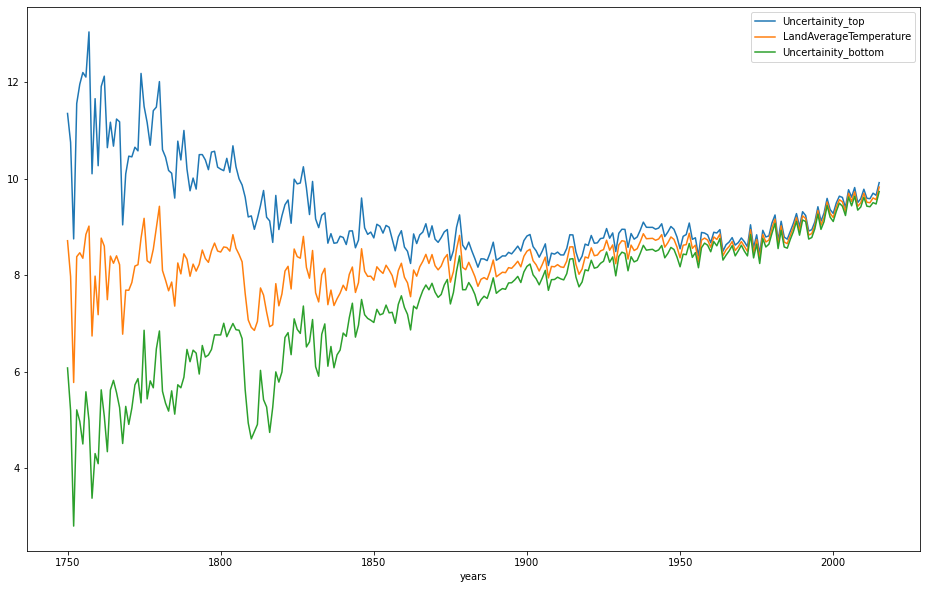

In [ ]:

data.plot(x='years',y=['Uncertainity_top','LandAverageTemperature',
        'Uncertainity_bottom'],figsize=(16,10))

In [ ]:
 import plotly.graph_objs as go
fig = go.Figure()
for col in ['Uncertainity_top','LandAverageTemperature','Uncertainity_bottom']:
    fig.add_trace(go.Line(x=data.years, y=data[col],name=col))
fig.show()

From the charts you can see, that there is global warming nowadays. The average temperature of Earth surface has the highest value in the last three centuries. The fastest temperature growth occurred in the last 30 years

### Analyse Average temperature in each season

In [ ]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [ ]:
global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
years                                         object
dtype: object

In [ ]:
global_temp['dt']=pd.to_datetime(global_temp['dt'])

In [ ]:
global_temp.dtypes

dt                                           datetime64[ns]
LandAverageTemperature                              float64
LandAverageTemperatureUncertainty                   float64
LandMaxTemperature                                  float64
LandMaxTemperatureUncertainty                       float64
LandMinTemperature                                  float64
LandMinTemperatureUncertainty                       float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
years                                                object
dtype: object

To fetch the month alone

In [ ]:
global_temp['month']=global_temp['dt'].dt.month

In [ ]:
global_temp.head(15)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN,1750,6
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN,1750,7
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN,1750,8
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN,1750,9
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN,1750,10


In [ ]:
def get_season(month):
    if month>=3 and month<=5:
        return 'spring'
    elif month>=6 and month<=8:
        return 'summer'
    elif month>=9 and month<=11:
        return 'autumn'
    else:
        return 'winter'

In [ ]:
global_temp['season']=global_temp['month'].apply(get_season)

In [ ]:
global_temp.head(15)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN,1750,6,summer
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN,1750,7,summer
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN,1750,8,summer
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN,1750,9,autumn
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN,1750,10,autumn


In [ ]:
years=global_temp['years'].unique()

In [ ]:
years

array(['1750', '1751', '1752', '1753', '1754', '1755', '1756', '1757',
       '1758', '1759', '1760', '1761', '1762', '1763', '1764', '1765',
       '1766', '1767', '1768', '1769', '1770', '1771', '1772', '1773',
       '1774', '1775', '1776', '1777', '1778', '1779', '1780', '1781',
       '1782', '1783', '1784', '1785', '1786', '1787', '1788', '1789',
       '1790', '1791', '1792', '1793', '1794', '1795', '1796', '1797',
       '1798', '1799', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1813',
       '1814', '1815', '1816', '1817', '1818', '1819', '1820', '1821',
       '1822', '1823', '1824', '1825', '1826', '1827', '1828', '1829',
       '1830', '1831', '1832', '1833', '1834', '1835', '1836', '1837',
       '1838', '1839', '1840', '1841', '1842', '1843', '1844', '1845',
       '1846', '1847', '1848', '1849', '1850', '1851', '1852', '1853',
       '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861',
      

In [ ]:
spring_temps=[]
summer_temps=[]
autumn_temps=[]
winter_temps=[]

For calculating the average LandAverageTemperature for all seasons

In [ ]:
for year in years:
    current_df=global_temp[global_temp['years']==year]
    spring_temps.append(current_df[current_df['season']=='spring']['LandAverageTemperature'].mean())
    summer_temps.append(current_df[current_df['season']=='summer']['LandAverageTemperature'].mean())
    autumn_temps.append(current_df[current_df['season']=='autumn']['LandAverageTemperature'].mean())
    winter_temps.append(current_df[current_df['season']=='winter']['LandAverageTemperature'].mean())

Creating a new data frame

In [ ]:
season=pd.DataFrame()

In [ ]:
season['year']=years
season['spring_temps']=spring_temps
season['summer_temps']=summer_temps
season['autumn_temps']=autumn_temps
season['winter_temps']=winter_temps

In [ ]:
season.head()

,year,spring_temps,summer_temps,autumn_temps,winter_temps
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333


In [ ]:
season.columns

Index(['year', 'spring_temps', 'summer_temps', 'autumn_temps', 'winter_temps'], dtype='object')

In [ ]:
import plotly.graph_objs as go
fig = go.Figure()
for col in ['spring_temps','summer_temps','autumn_temps','winter_temps']:
    fig.add_trace(go.Line(x=season.year, y=season[col],name=col))
fig.show()

    Is it getting warmer? Yes, it is.

 Building a Time Series Model

In [ ]:
cities=pd.read_csv(/content/GlobalLandTemperaturesByCity.csv')

In [ ]:
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
cities.shape

(8599212, 7)

In [ ]:
usa=cities[cities['Country']=='United States']

In [ ]:
usa.shape

(687289, 7)

In [ ]:
data=['New York','Los Angeles','San Francisco']

In [ ]:
data2=usa[usa['City'].isin(data)]

In [ ]:
data2.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
4356748,1849-01-01,8.819,2.558,Los Angeles,United States,34.56N,118.70W
4356749,1849-02-01,9.577,1.970,Los Angeles,United States,34.56N,118.70W
4356750,1849-03-01,11.814,2.173,Los Angeles,United States,34.56N,118.70W
4356751,1849-04-01,13.704,2.902,Los Angeles,United States,34.56N,118.70W
4356752,1849-05-01,14.834,2.017,Los Angeles,United States,34.56N,118.70W


Extracting the required columns

In [ ]:
data2=data2[['dt','AverageTemperature']]

In [ ]:
data2.head()

,dt,AverageTemperature
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [ ]:
data2.columns=['Date','Temp']

In [ ]:
data2.head()

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [ ]:
data2.dtypes

Date     object
Temp    float64
dtype: object

In [ ]:
data2['Date']=pd.to_datetime(data2['Date'])

In [ ]:
data2.isna().sum()

Date      0
Temp    120
dtype: int64

In [ ]:
data2.dropna(inplace=True)

In [ ]:
data2.shape

(7073, 2)

for Machine Learning,feature is a columns & we have by-default index as from 0 but for our time series Problem,we have date column our as row-index

In [ ]:
data2.set_index('Date',inplace=True)

In [ ]:
data2.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


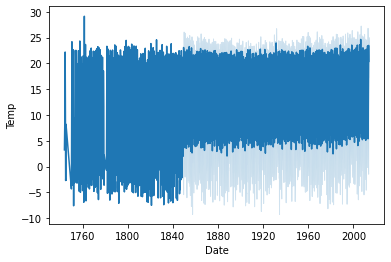

In [ ]:
sns.lineplot(x=data2.index,y=data2['Temp'])

Statistical test to check stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
#apply adfuller on data2['Temp']
test_result=adfuller(data2['Temp'])


*   Null Hypotehsis (H0): it suggests the time 
series has a unit root, meaning it is non-stationary. It has some time dependent structure.
*   Alternate Hypothesis (H1): it suggests the time series does not have a unit root, meaning it is stationary.

* p-value > 0.05: Accept H0, the data has a unit root and is non-stationary
* p-value ≤ 0.05: Reject H0. the data does not have a unit root and is stationary











In [ ]:
def adfuller_test(Temp):
    result=adfuller(Temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
adfuller_test(data2['Temp'])

ADF Test Staistics : -2.006389303675715
p-value : 0.283778658333361
#lags used : 35
Number of observations used : 7037
weak evidemce against the null hypo , accept the null hypo ,data has no unit root and non stationery


In [ ]:
df=data2.copy()

In [ ]:
df.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


To make the data stationary

In [ ]:
df['first_temp_diff']=df['Temp']-df['Temp'].shift(12)

In [ ]:
df.head(20)

,Temp,first_temp_diff
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN
1849-06-01,21.173,NaN
1849-07-01,26.159,NaN
1849-08-01,26.099,NaN
1849-09-01,21.848,NaN


In [ ]:
adfuller_test(df['first_temp_diff'].dropna())

ADF Test Statistic : -21.239650404910833
p-value : 0.0
#Lags Used : 35
Number of Observations Used : 7025
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


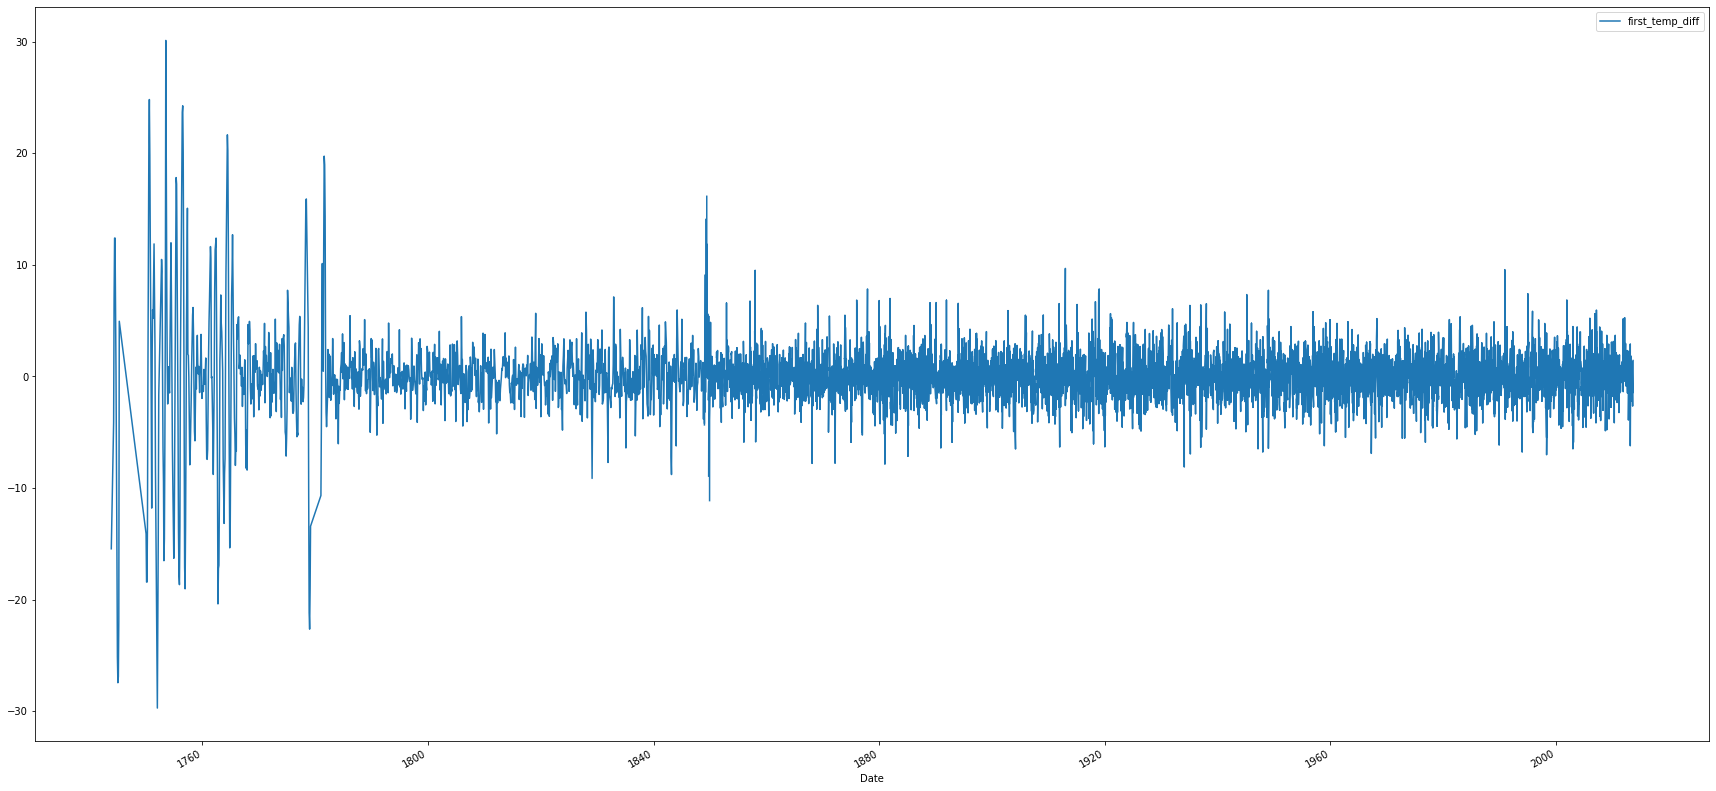

In [ ]:
df[['first_temp_diff']].plot(figsize=(30,15))

### Examine whether there is a seasonality factor in your data 

In [ ]:
data2.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


In [ ]:
data2['month']=data2.index.month

In [ ]:
data2['year']=data2.index.year

In [ ]:
data2.head()

,Temp,month,year
Date,,,
1849-01-01,8.819,1,1849
1849-02-01,9.577,2,1849
1849-03-01,11.814,3,1849
1849-04-01,13.704,4,1849
1849-05-01,14.834,5,1849


In [ ]:
pivot=data2.pivot_table(values='Temp',index='month',columns='year')

In [ ]:
pivot

year,1743,1744,1745,1750,1751,1752,1753,1754,1755,1756,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,-2.363,-4.310,-3.591,-7.588,-3.122,-2.252,-3.193,-1.985,...,4.080333,4.923000,7.135333,5.656000,5.216333,5.550333,5.776667,5.109333,7.177667,5.388333
2,NaN,NaN,-2.671,-2.719,-2.051,NaN,-1.467,-2.583,-1.802,0.259,...,6.100000,7.297000,7.547667,5.634000,6.754333,6.540667,6.788000,5.777333,7.970000,6.222667
3,NaN,NaN,1.363,2.773,3.256,3.322,4.207,2.728,1.112,NaN,...,12.184000,9.124667,7.527333,10.586000,9.733667,9.211000,10.486667,9.115000,10.604333,10.162333
4,NaN,9.788,8.209,8.848,7.992,7.402,8.099,NaN,8.714,NaN,...,13.806333,12.546000,12.051667,12.342000,13.113000,12.744000,12.254000,12.710000,13.075000,13.880000
5,NaN,15.708,NaN,15.411,NaN,NaN,15.330,NaN,15.238,NaN,...,17.817333,15.982333,17.123333,17.150000,15.800333,17.565667,15.856333,15.724000,17.670333,17.335333
6,NaN,21.210,NaN,19.017,20.724,NaN,20.820,20.075,19.964,20.488,...,19.872000,19.775333,21.395333,20.514333,21.474667,18.941667,20.436667,19.305000,19.904333,21.028333
7,NaN,22.207,NaN,24.203,22.668,NaN,22.524,22.503,NaN,22.452,...,22.246333,23.611667,24.655333,22.628333,23.020000,22.247667,22.538667,22.733333,22.654000,23.489667
8,NaN,NaN,NaN,22.135,21.547,NaN,21.324,21.461,NaN,21.208,...,22.101333,23.028333,21.920333,22.690000,22.305333,22.578000,21.665333,22.028667,23.384667,21.654667
9,NaN,14.922,NaN,17.445,15.812,NaN,15.548,16.281,16.137,17.345,...,20.669333,19.427667,19.365333,19.559000,20.686667,20.752667,20.537333,20.856333,20.655667,20.393333


Text(0, 0.5, 'Temperatures')

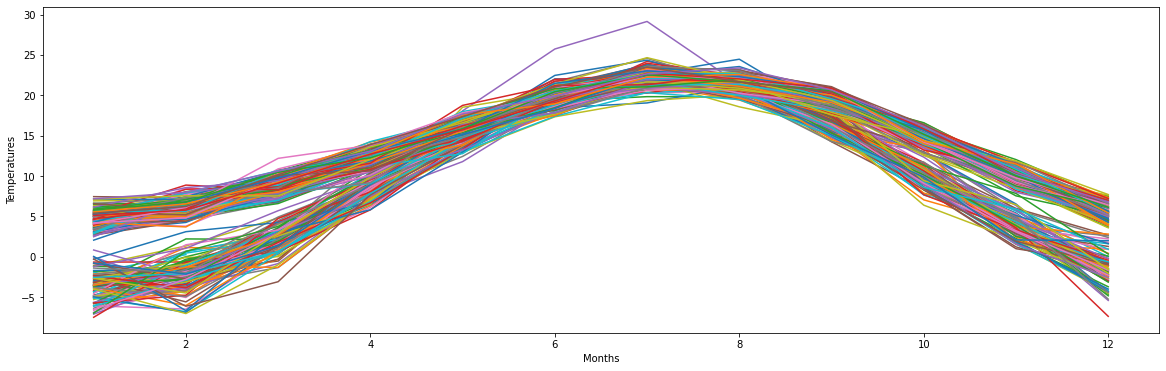

In [ ]:
pivot.plot(figsize=(20,6))
plt.legend().remove()
plt.xlabel('Months')
plt.ylabel('Temperatures')

So we can say this data is seasonal. The series clearly has some seasonality, the higher temperatures are around b/w June & August and the lower are between December & Feb 

To make the above visualisation more clear

In [ ]:
monthly_seasonality=pivot.mean(axis=1)

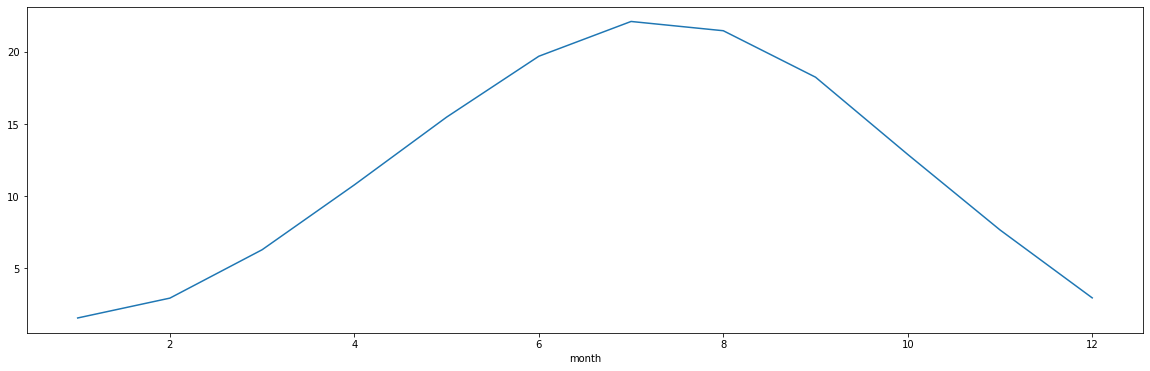

In [ ]:
monthly_seasonality.plot(figsize=(20,6))

Moving average method

In [ ]:
df.head()

,Temp,first_temp_diff
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN


In [ ]:
df=df[['first_temp_diff']]

In [ ]:
df.head()

,first_temp_diff
Date,
1849-01-01,NaN
1849-02-01,NaN
1849-03-01,NaN
1849-04-01,NaN
1849-05-01,NaN


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,first_temp_diff
Date,
1850-01-01,-1.732
1850-02-01,-1.002
1850-03-01,-1.449
1850-04-01,0.031
1850-05-01,1.799


In [ ]:
### smoothening your Time Series data

In [ ]:
df['first_temp_diff'].rolling(window=5).mean()

Date
1850-01-01       NaN
1850-02-01       NaN
1850-03-01       NaN
1850-04-01       NaN
1850-05-01   -0.4706
               ...  
2013-05-01    0.4336
2013-06-01    1.0236
2013-07-01    1.4060
2013-08-01    0.8454
2013-09-01    0.7614
Name: first_temp_diff, Length: 7061, dtype: float64

In [ ]:
value=pd.DataFrame(df['first_temp_diff'])

In [ ]:
temp_df=pd.concat([value,df['first_temp_diff'].rolling(window=5).mean()],axis=1)

In [ ]:
temp_df.columns=['actual_temp','forecast_temp']

In [ ]:
temp_df.head(20)

,actual_temp,forecast_temp
Date,,
1850-01-01,-1.732,NaN
1850-02-01,-1.002,NaN
1850-03-01,-1.449,NaN
1850-04-01,0.031,NaN
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106
1850-07-01,-2.714,-0.6530
1850-08-01,-0.164,-0.3960
1850-09-01,0.714,-0.2594


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
###check accuracy
np.sqrt(mean_squared_error(temp_df['forecast_temp'][4:],temp_df['actual_temp'][4:]))

2.3934235122562058

This shows that there will be +2 or -2 variations in our predicted model, still to reduce it,  we go for a better model called ARIMA

#Arima model

To find p,d,q

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
df.head()

,first_temp_diff
Date,
1850-01-01,-1.732
1850-02-01,-1.002
1850-03-01,-1.449
1850-04-01,0.031
1850-05-01,1.799


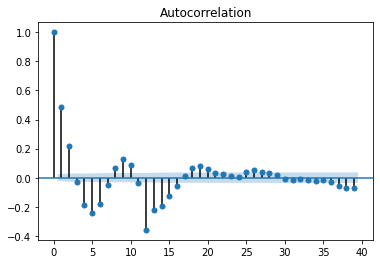

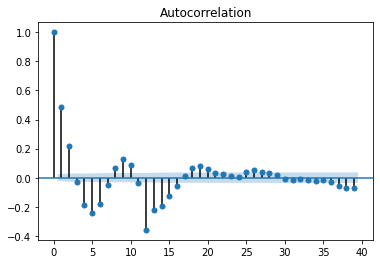

In [ ]:
plot_acf(df['first_temp_diff'].dropna())

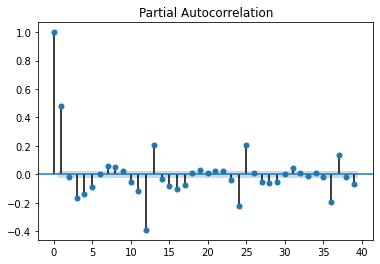

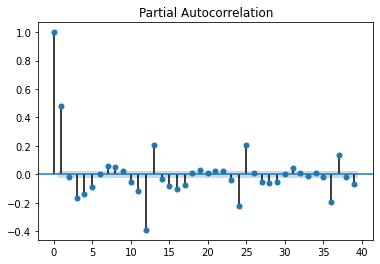

In [ ]:
plot_pacf(df['first_temp_diff'].dropna())

In [ ]:
df.isna().sum()

first_temp_diff    0
dtype: int64

In [ ]:
df.shape

(7061, 1)

In [ ]:
training_data=df[0:6000]
### create test that is basically unseen to our model, or which is basocally is used for evalaution
test_data=df[6000:]

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
arima=ARIMA(training_data,order=(2,1,3))

In [ ]:
model=arima.fit()

In [ ]:
predictions=model.forecast(steps=len(test_data))[0]

In [ ]:
np.sqrt(mean_squared_error(test_data,predictions))

1.5120453542239605

So comparing to the previous model , here the mse value is decreased slightly and we can conclude it as the best fit.